This code builds and trains a Convolutional Neural Network (CNN) to recognize handwritten digits from the MNIST dataset, and also allows you to predict digits from test images. 

TensorFlow: A library for creating and training machine learning models.
Keras: A high-level API in TensorFlow for building neural networks.
NumPy: A library for numerical operations.
Matplotlib: A library for creating visualizations like plots.

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets


2024-12-11 10:34:19.005955: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-11 10:34:19.180905: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-11 10:34:19.270235: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-11 10:34:19.300671: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-11 10:34:19.418098: I tensorflow/core/platform/cpu_feature_guar

The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0-9).
x_train and y_train: Images and their corresponding labels used for training.
x_test and y_test: Images and labels used for testing the model.

In [6]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Normalizing the Data:

    Divide the pixel values by 255 to scale them between 0 and 1. This helps the model learn better.

Reshaping:

    Convert the data into the format (number of samples, height, width, channels).
    -1 lets Python infer the number of samples automatically.
    28, 28, 1: Each image is 28x28 pixels with a single color channel (grayscale).

In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

Building the CNN Model

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  
    layers.Dense(10, activation='softmax')  
])


/home/akshita/miniconda3/envs/ML/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    Adam: An optimization algorithm to minimize the error during training.
    sparse_categorical_crossentropy: A loss function for multi-class classification.
    accuracy: Metric to evaluate the model's performance.

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    Trains the model on x_train and y_train:
        epochs: Number of times the model will go through the entire training data.
        batch_size: Processes 64 samples at a time for efficiency.
        validation_split: Reserves 20% of the training data to validate the model during training.

In [12]:
model.fit(x_train, y_train, epochs=6, batch_size=64, validation_split=0.2)

Epoch 1/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9937 - loss: 0.0192 - val_accuracy: 0.9916 - val_loss: 0.0350
Epoch 2/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9929 - loss: 0.0216 - val_accuracy: 0.9919 - val_loss: 0.0369
Epoch 3/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9942 - loss: 0.0186 - val_accuracy: 0.9906 - val_loss: 0.0414
Epoch 4/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9942 - loss: 0.0180 - val_accuracy: 0.9902 - val_loss: 0.0407
Epoch 5/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9945 - loss: 0.0162 - val_accuracy: 0.9911 - val_loss: 0.0437
Epoch 6/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9951 - loss: 0.0148 - val_accuracy: 0.9910 - val_loss: 0.0440


Evaluates the trained model on the test data (x_test, y_test).
Prints the accuracy on unseen test images.

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

313/313 - 3s - 9ms/step - accuracy: 0.9922 - loss: 0.0299
Test Accuracy: 0.9922000169754028


predict_digit:

    Reshapes the input image to the required format (1, 28, 28, 1).
    Predicts the probabilities for each digit (0-9).
    Uses np.argmax() to find the digit with the highest probability.

In [14]:
def predict_digit(model, image):
    image = image.reshape(1, 28, 28, 1) 
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)  
    return predicted_class, prediction

Select a Random Test Image:

    Picks an image from x_test and its true label from y_test.

Predict the Digit:

    Calls the predict_digit function.

Visualize:

    Displays the test image and shows the true label and the predicted digit.

Print Probabilities:

    Displays the confidence scores for all digits.

In [16]:
import numpy as np

In [17]:
index = np.random.randint(0, len(x_test))  
test_image = x_test[index]
true_label = y_test[index]

In [18]:
predicted_digit, probabilities = predict_digit(model, test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


In [23]:
import matplotlib.pyplot as plt


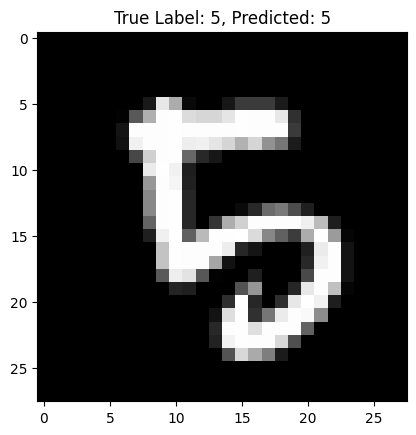

In [24]:
plt.imshow(test_image.squeeze(), cmap='gray')  
plt.title(f"True Label: {true_label}, Predicted: {predicted_digit}")
plt.show()

In [25]:
print(f"Predicted Probabilities: {probabilities}")
print(f"Predicted Digit: {predicted_digit}")

Predicted Probabilities: [[2.1494690e-12 5.9397924e-11 9.5352295e-09 2.9001196e-04 1.2835678e-12
  9.9967825e-01 9.0054980e-10 2.4090046e-08 7.2138971e-07 3.0953470e-05]]
Predicted Digit: 5
